# determining indicators of heavy traffic in new york . by analysing the
# Metro_Interstate_Traffic_Volume.csv dataset

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
data=pd.read_csv("Metro_Interstate_Traffic_Volume.csv")


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,30-09-2018 19:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,30-09-2018 20:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,30-09-2018 21:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,30-09-2018 22:00,1450


In [5]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00,4918


In [6]:
data.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,30-09-2018 19:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,30-09-2018 20:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,30-09-2018 21:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,30-09-2018 22:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,30-09-2018 23:00,954


In [7]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


<Axes: ylabel='Frequency'>

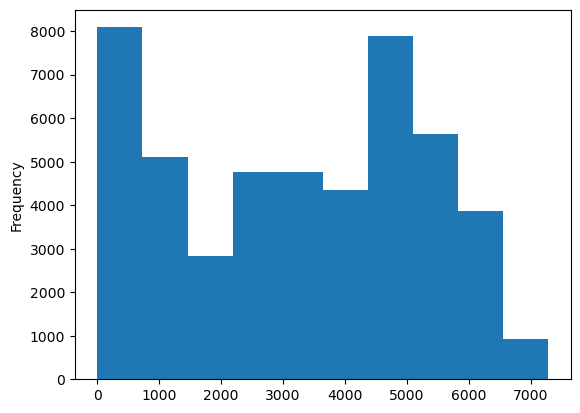

In [9]:
data["traffic_volume"].plot.hist()

<Axes: xlabel='traffic_volume', ylabel='Count'>

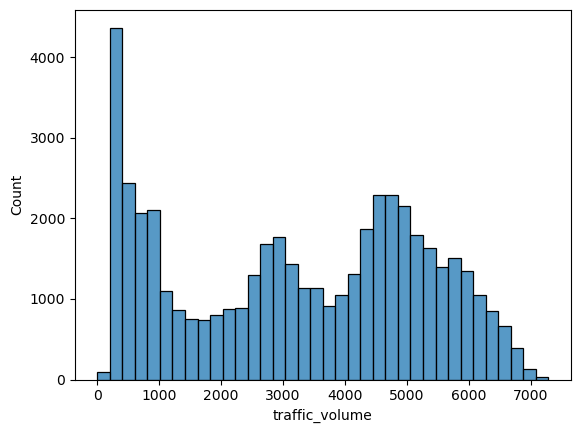

In [11]:
import seaborn as sns 
sns.histplot(data["traffic_volume"])

In [12]:
data["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

# pd.to_datetime is a function which change date time and hour in a series 
# here data["date_time"].dt.hour     (dt.hour has changed the varible data_time_hour into hour series 

In [13]:
data["date_time"] = pd.to_datetime(data["date_time"])
date_time_hour = data["date_time"].dt.hour

In [14]:
day = data[(date_time_hour >= 7) & (date_time_hour < 19)]
day.shape

(23877, 9)

In [17]:
night = data[(date_time_hour >= 19) | (date_time_hour < 7)]
night.shape



(24327, 9)

# saperate day time and  night time with 

(0.0, 8000.0)

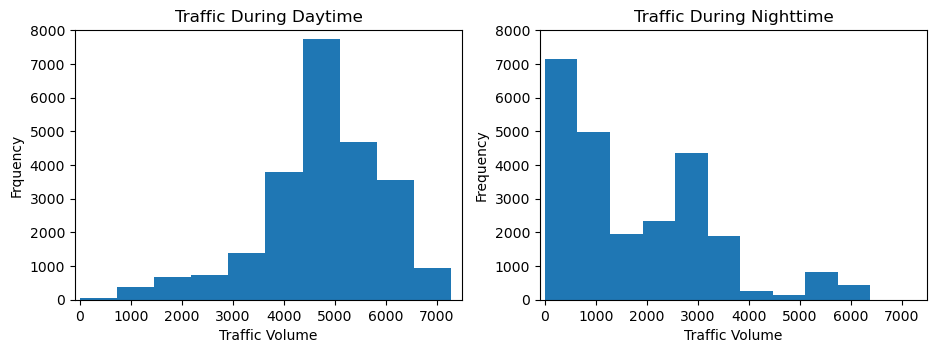

In [19]:
plt.figure(figsize=(11,3.5))
plt.subplot(1,2,1)
plt.hist(day["traffic_volume"])
plt.title("Traffic During Daytime")
plt.xlabel("Traffic Volume")
plt.ylabel("Frquency")
plt.xlim(-100, 7500)
plt.ylim(0, 8000)


plt.subplot(1,2,2)
plt.hist(night["traffic_volume"])
plt.title("Traffic During Nighttime")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.xlim(-100, 7500)
plt.ylim(0, 8000)


In [20]:
day.describe()


,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,23877.000000,23877.00000,23877.000000,23877.000000,23877.000000
mean,282.257596,0.53306,0.000253,53.122000,4762.047452
std,13.298885,63.62932,0.008853,37.564588,1174.546482
min,0.000000,0.00000,0.000000,0.000000,0.000000
25%,272.680000,0.00000,0.000000,5.000000,4252.000000
50%,283.780000,0.00000,0.000000,75.000000,4820.000000
75%,293.440000,0.00000,0.000000,90.000000,5559.000000
max,310.070000,9831.30000,0.510000,100.000000,7280.000000


In [21]:
night.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000
mean,280.173600,0.139145,0.000192,45.672011,1785.377441
std,13.296357,1.110872,0.007434,40.048382,1441.951197
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,271.700000,0.000000,0.000000,1.000000,530.000000
50%,281.379000,0.000000,0.000000,40.000000,1287.000000
75%,290.700000,0.000000,0.000000,90.000000,2819.000000
max,307.680000,55.630000,0.510000,100.000000,6386.000000


C:\Users\pant\AppData\Local\Temp\ipykernel_2368\2623753924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['month'] = day['date_time'].dt.month
C:\Users\pant\AppData\Local\Temp\ipykernel_2368\2623753924.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_month = day.groupby('month').mean()


<Axes: xlabel='month'>

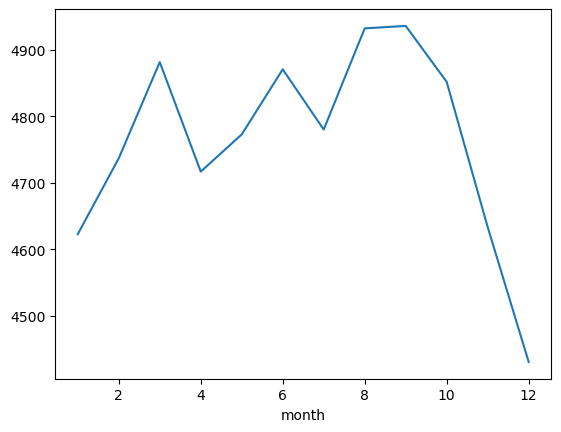

In [22]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume'].plot.line()


C:\Users\pant\AppData\Local\Temp\ipykernel_2368\296032329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['dayofweek'] = day['date_time'].dt.dayofweek
C:\Users\pant\AppData\Local\Temp\ipykernel_2368\296032329.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_dayofweek = day.groupby('dayofweek').mean()


<Axes: xlabel='dayofweek'>

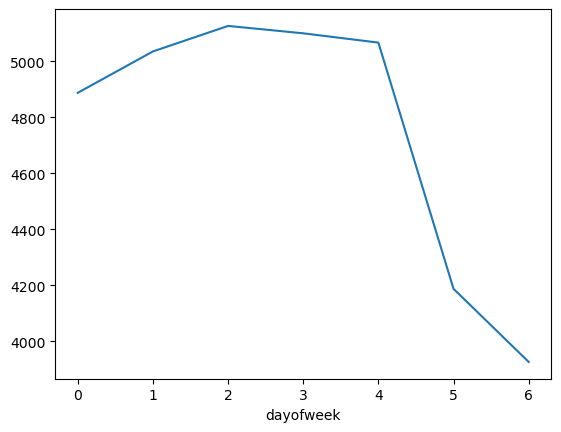

In [29]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()

In [30]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

C:\Users\pant\AppData\Local\Temp\ipykernel_2368\4074856676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['hour'] = day['date_time'].dt.hour
C:\Users\pant\AppData\Local\Temp\ipykernel_2368\4074856676.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_hour_business = bussiness_days.groupby('hour').mean()
C:\Users\pant\AppData\Local\Temp\ipykernel_2368\4074856676.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or sel

(1500.0, 7500.0)

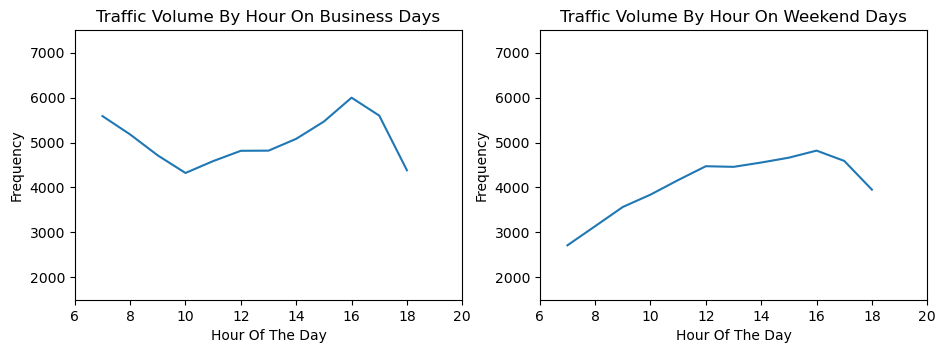

In [31]:
plt.figure(figsize=(11,3.5))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title("Traffic Volume By Hour On Business Days")
plt.xlabel("Hour Of The Day")
plt.ylabel("Frequency")
plt.xlim(6,20)
plt.ylim(1500, 7500)

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title("Traffic Volume By Hour On Weekend Days")
plt.xlabel("Hour Of The Day")
plt.ylabel("Frequency")
plt.xlim(6,20)
plt.ylim(1500, 7500)

C:\Users\pant\AppData\Local\Temp\ipykernel_2368\4224808452.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  day.corr()['traffic_volume']


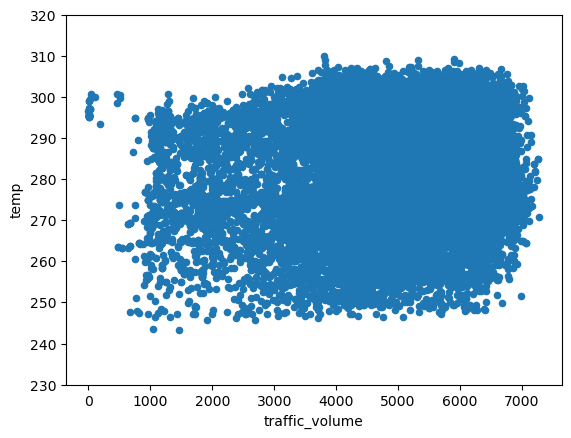

C:\Users\pant\AppData\Local\Temp\ipykernel_2368\4224808452.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_weather_main = day.groupby('weather_main').mean()


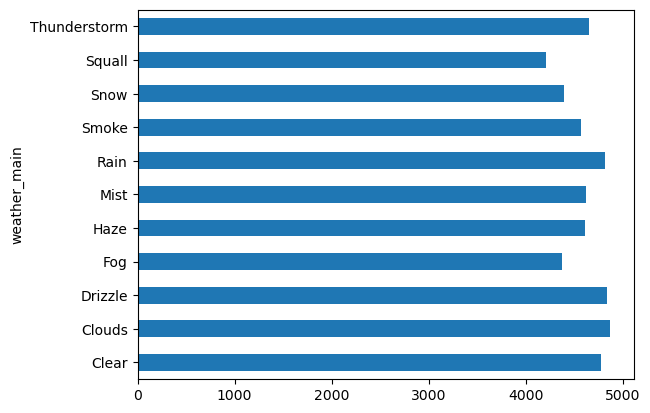

C:\Users\pant\AppData\Local\Temp\ipykernel_2368\4224808452.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_weather_description = day.groupby('weather_description').mean()


<Axes: ylabel='weather_description'>

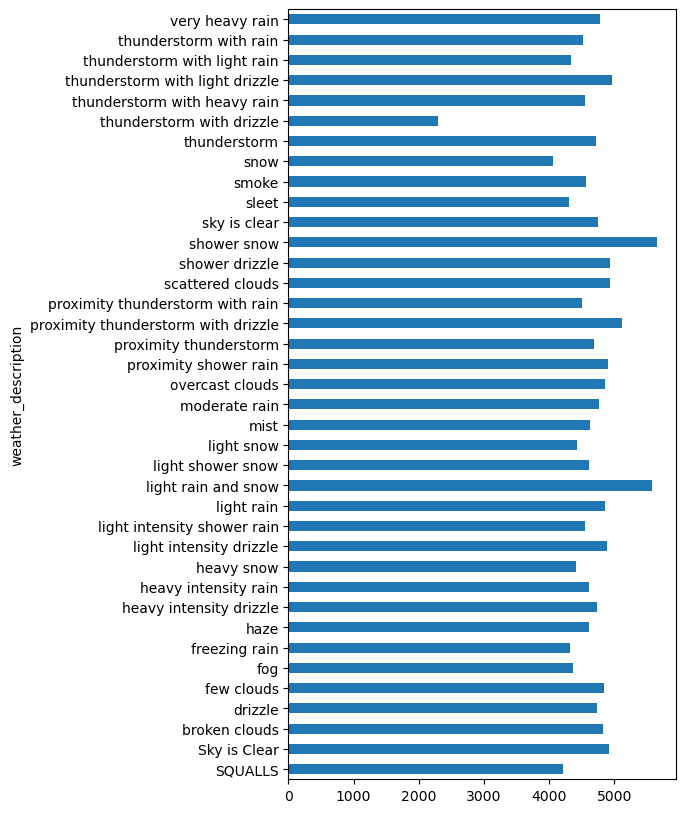

In [32]:
day.corr()['traffic_volume']
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis
plt.show()

by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))

# It looks like there are three weather types where traffic volume exceeds 5,000:
• Shower snow
• Light rain and snow
• Proximity thunderstorm with drizzle It's not clear why these weather types have the
highest average traffic values — this is bad weather, but not that bad. Perhaps more
people take their cars out of the garage when the weather is bad instead of riding a
bike or walking.
It looks like there are three weather types where traffic volume exceeds 5,000:

# Shower snow Light rain and snow Proximity thunderstorm with drizzle It's not clear why
these weather types have the highest average traffic values — this is bad weather, but not
that bad. Perhaps more people take their cars out of the garage when the weather is bad
instead of riding a bike or walking.